In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('../data/Index2018.csv')
df_comp = raw_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size].copy(), df_comp.iloc[size:].copy()

In [4]:
df['returns'] = df.market_value.pct_change(1).mul(100)

# LLR Test

In [5]:
def LLR_test(mod_1, mod_2, DF=1):
    # DF: degrees of freedom
    
    # log likelihood
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    
    # test statistic
    LR = (2 * (L2 - L1))
    p = chi2.sf(LR, DF).round(3)
    
    return p

# ACF for Returns

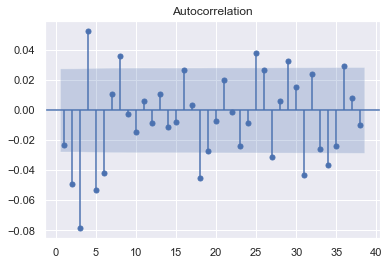

In [6]:
sgt.plot_acf(df.returns[1:], zero=False)
plt.show()

# MA(1) for Returns

ARMA(order=(P, Q))  
p: AR components   
Q: MA components  


In [7]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0, 1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Tue, 19 Jan 2021   AIC                          15865.190
Time:                        22:16:54   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

The p-values for both constant and the coefficient are not significant with 5% significance level. We know this from the ACF graph that the autocorrelation with the first lag is within the blue shade area. However, there are higher lags such as 2nd, 3rd, 4th, 5th, 6th lags that are significant. Therefore, we will check higher lag MA models. 